In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import matplotlib
from pylab import rcParams
import numpy as np
import seaborn as sns
import seaborn as sb
import os
import datetime

from pandas import Series, DataFrame
from numpy import pi
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics




In [36]:
df = pd.read_csv('data/VN Index Historical Data new.csv')

In [37]:
df['Date'] = pd.to_datetime(df.Date, infer_datetime_format = True)
df.index = df['Date']

In [38]:
x = df[['Open', 'High', 'Low', 'Vol.']]
y = df['Price']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# convert to numpy array
x_train = df[['Open', 'High', 'Low', 'Vol.']].values
x_test = df[['Open', 'High', 'Low', 'Vol.']].values
y_train = df['Price'].values
y_test = df['Price'].values


In [40]:
print(x_train.shape)
print(x_test.shape)

(130, 4)
(130, 4)


In [41]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Regressor coefficient are :')
print(regressor.coef_)
print('Regressor intercept is :')
print(regressor.intercept_)


Regressor coefficient are :
[-8.18305193e-01  1.14159019e+00  6.83939534e-01 -8.16922914e-06]
Regressor intercept is :
-7.4414219321097335


In [42]:
y_predict = regressor.predict(x_test)
print('Predicted values are :')
print(y_predict)

Predicted values are :
[1407.78076521 1416.70539802 1400.30467753 1378.00410101 1375.8593922
 1369.97464169 1344.81407853 1289.2565964  1294.8751218  1281.46060659
 1294.0385174  1304.36495526 1253.20765837 1262.09981941 1279.45825648
 1291.91960826 1276.06666709 1266.35136197 1287.68787577 1276.70787946
 1293.71371897 1311.21067012 1317.29169907 1331.78740658 1335.95335606
 1339.88176521 1346.20355727 1355.90763572 1367.17458085 1368.30977883
 1359.10041342 1343.12688246 1370.09437853 1369.0169899  1363.35508065
 1367.7901522  1328.246209   1304.1899508  1298.26482325 1304.63195125
 1305.52180589 1300.35688725 1328.46393787 1331.75601599 1332.95936893
 1344.7869033  1345.72130278 1332.72792825 1343.58733571 1348.72030253
 1344.10483094 1343.36353439 1342.1811331  1348.38798583 1353.26333174
 1360.44944188 1328.22235647 1345.92279878 1356.55987708 1351.19134993
 1332.88986554 1335.36076423 1330.85122813 1348.91384895 1334.35022739
 1344.53320982 1353.80489201 1361.12097437 1363.5263984

In [43]:
df_linear = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict})
df_linear['error'] = (abs(df_linear['Actual value'] - df_linear['Predicted value']) / df_linear['Actual value']) * 100

print(df_linear.head(20))
#print(df.tail(5))

    Actual value  Predicted value     error
0        1417.08      1407.780765  0.656225
1        1420.27      1416.705398  0.250981
2        1411.13      1400.304678  0.767139
3        1354.79      1378.004101  1.713483
4        1388.55      1375.859392  0.913947
5        1374.68      1369.974642  0.342288
6        1347.14      1344.814079  0.172656
7        1296.30      1289.256596  0.543347
8        1297.54      1294.875122  0.205379
9        1279.91      1281.460607  0.121150
10       1293.92      1294.038517  0.009160
11       1299.31      1304.364955  0.389049
12       1243.51      1253.207658  0.779862
13       1273.29      1262.099819  0.878840
14       1270.79      1279.458256  0.682116
15       1293.67      1291.919608  0.135304
16       1268.83      1276.066667  0.570342
17       1272.71      1266.351362  0.499614
18       1276.93      1287.687876  0.842480
19       1277.07      1276.707879  0.028356


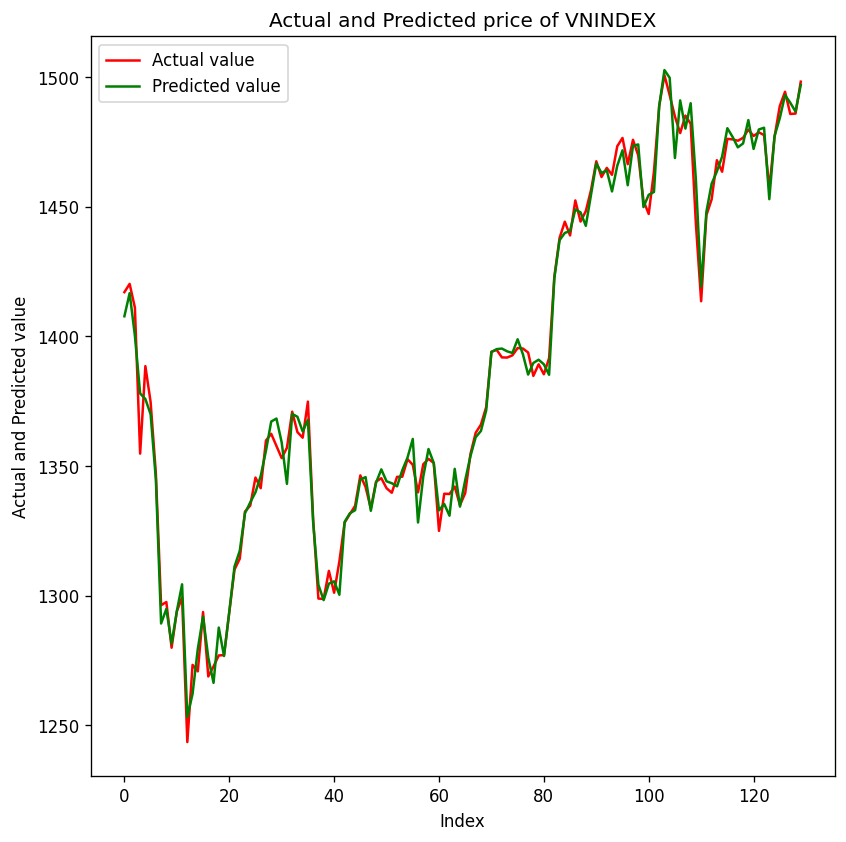

In [44]:
plt.plot(y_test, label = 'Actual value', linewidth = 1.5, color = 'red')
plt.plot(y_predict, label = 'Predicted value', linewidth = 1.5, color = 'green')
plt.title('Actual and Predicted price of VNINDEX')
plt.xlabel('Index')
plt.ylabel('Actual and Predicted value')
plt.legend(loc = 'best')
plt.show()

In [67]:
print('Mean Error: ', abs(np.mean(y_predict - y_test)))
print('Mean Absolute Error: ', np.mean(np.abs(y_predict - y_test)))
print('Mean Percentage Error: ', abs(np.mean((y_predict - y_test) / y_test)))
print('Mean Absolute Percentage Error: ', np.mean(np.abs(y_predict - y_test) / np.abs(y_test)))
print('Root Mean Square Error: ', np.mean((y_predict - y_test) ** 2)**.5)

Mean Error:  1.2942809217537824e-13
Mean Absolute Error:  4.453540487208826
Mean Percentage Error:  1.9105573138038542e-05
Mean Absolute Percentage Error:  0.00322136562541208
Root Mean Square Error:  5.948351841590711


In [71]:
data_result = [(abs(np.mean(y_predict - y_test)),
                 np.mean(np.abs(y_predict - y_test)),
               abs(np.mean((y_predict - y_test) / y_test)),
                np.mean(np.abs(y_predict - y_test) / np.abs(y_test)),
                 np.mean((y_predict - y_test) ** 2)**.5)]
df_result = pd.DataFrame(data = data_result, columns=['Mean Error','Mean Absolute Error'
                                                      ,'Mean Percentage Error'
                                                      ,'Mean Absolute Percentage Error'
                                                      ,'Root Mean Square Error'])
df_result.insert(0,'Model', 'Linear regression model')
df_result

,Model,Mean Error,Mean Absolute Error,Mean Percentage Error,Mean Absolute Percentage Error,Root Mean Square Error
0,Linear regression model,1.294281e-13,4.45354,0.000019,0.003221,5.948352


## 2) Arima model


In [46]:
from matplotlib.pyplot import step, ylim
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA

In [47]:

#ADF test

result = adfuller(df['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.807243
p-value: 0.816985
Critical values: 
	1%: -3.482
	5%: -2.884
	10%: -2.579


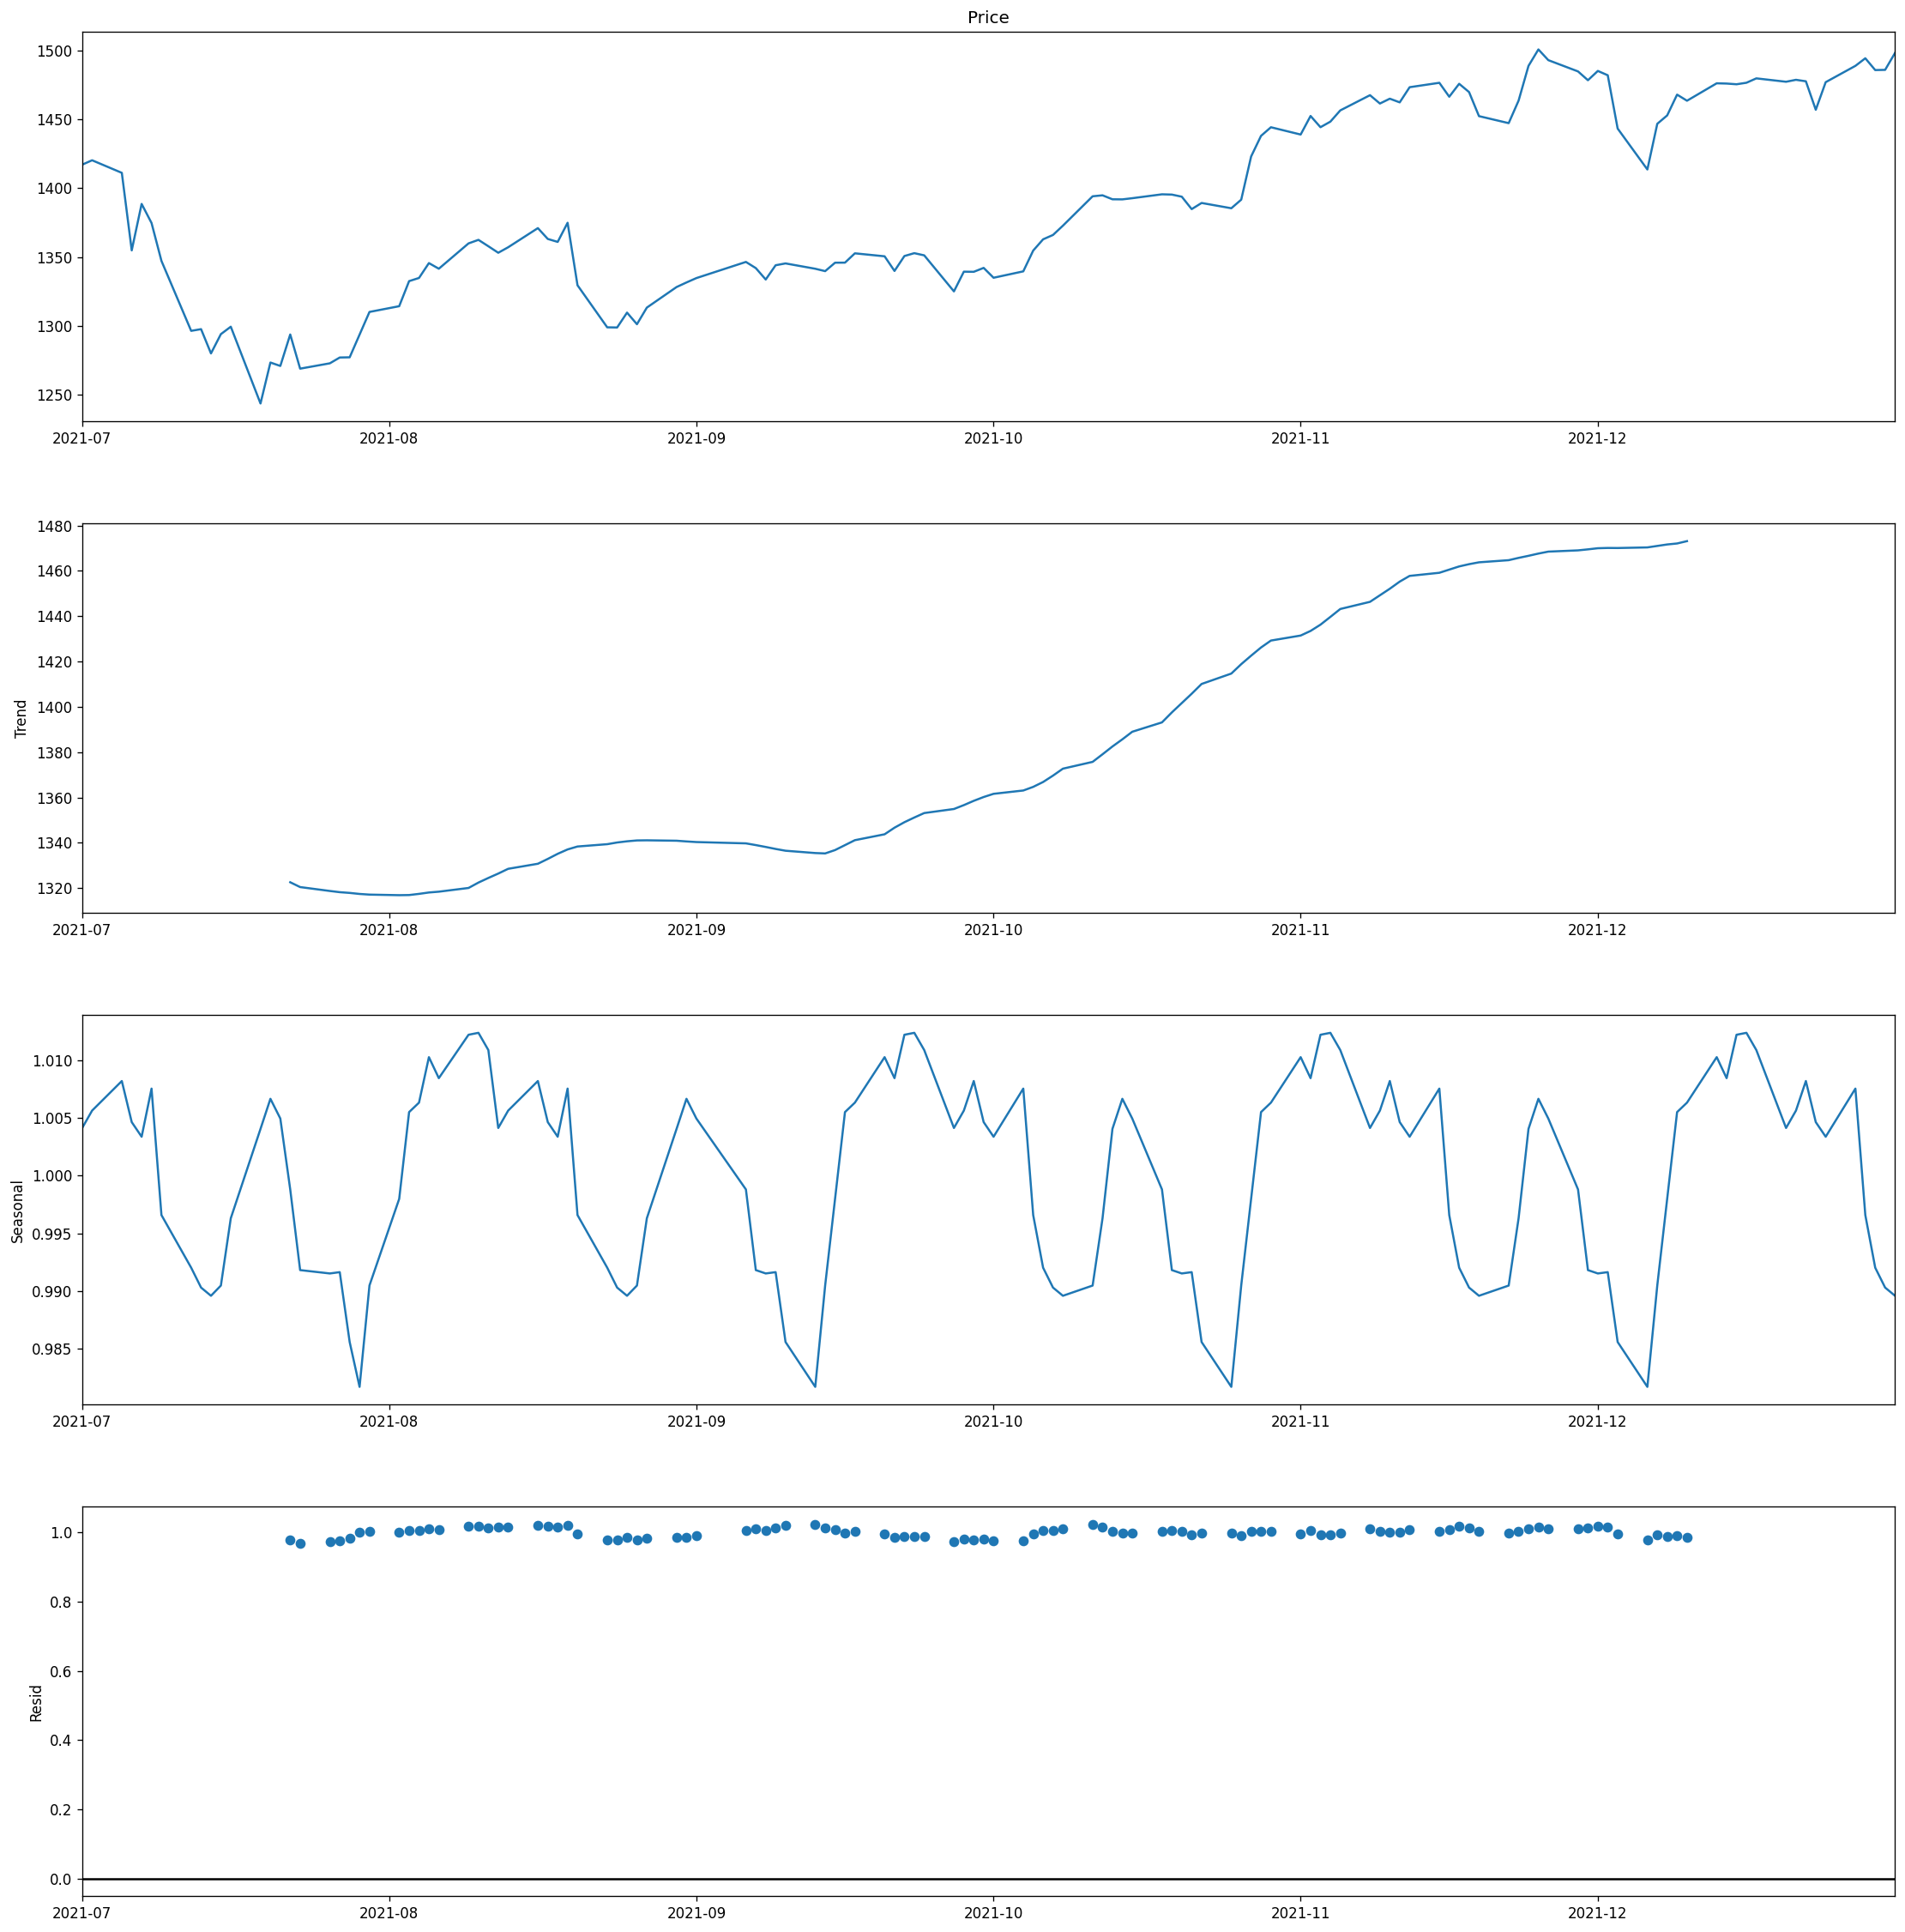

In [48]:
#trend and seasonality

result = seasonal_decompose(df['Price'], model = 'multiplicative', period = 30)
fig = result.plot()
fig.set_size_inches(20, 20)

plt.rcParams.update({'figure.figsize': (8, 8), 'figure.dpi': 120})

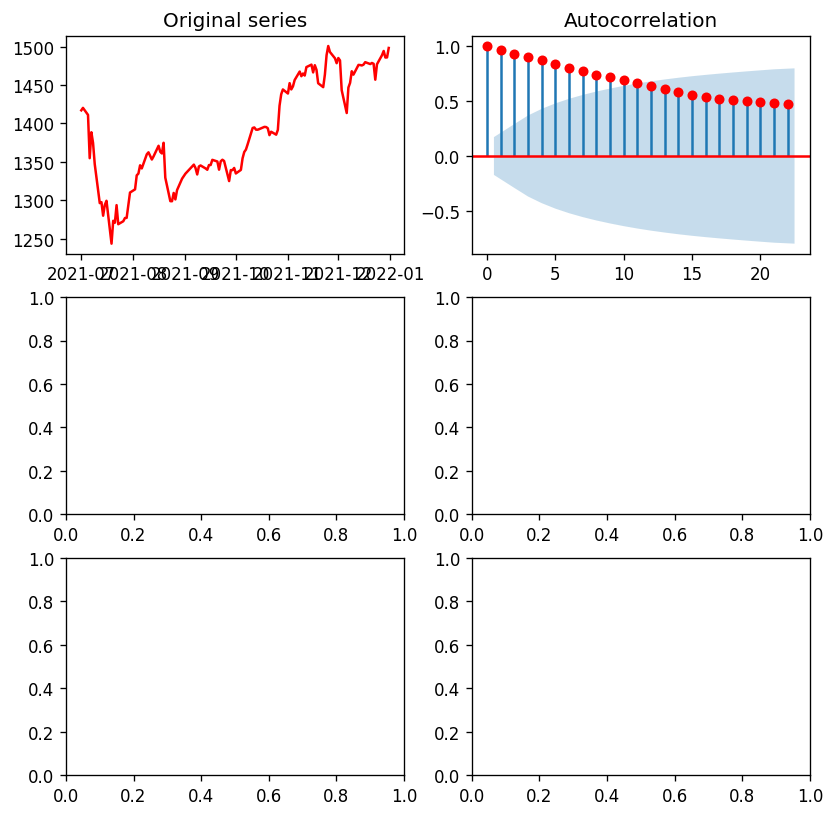

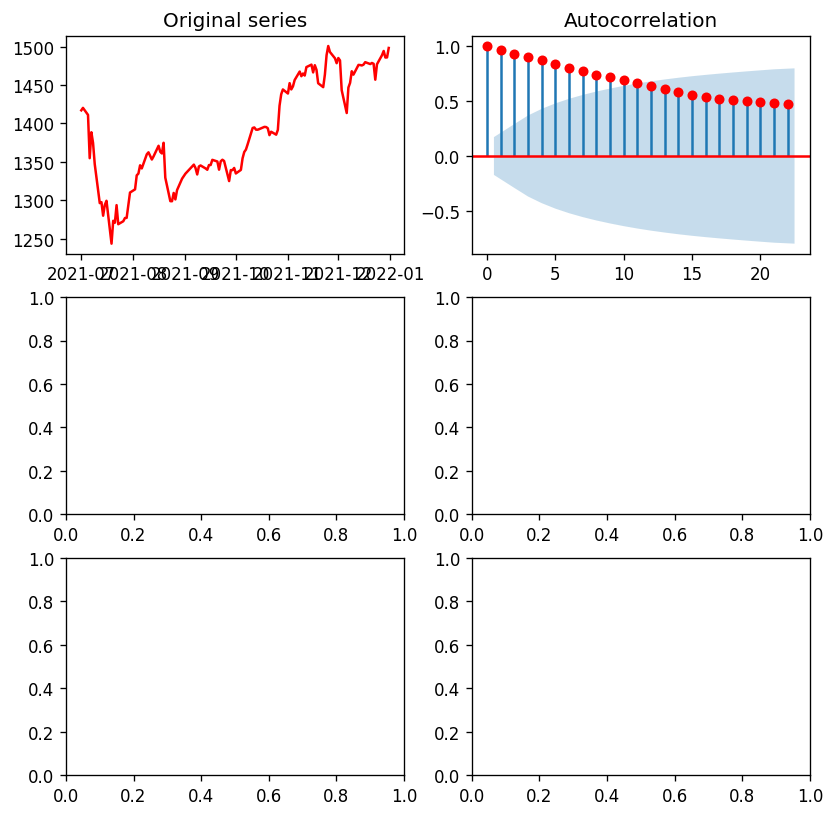

In [49]:
#Original series

fig, axis = plt.subplots(3, 2)
axis[0, 0].plot(df['Price'], color = 'red'); axis[0, 0].set_title('Original series')
plot_acf(df['Price'], ax = axis[0, 1], color = 'red')

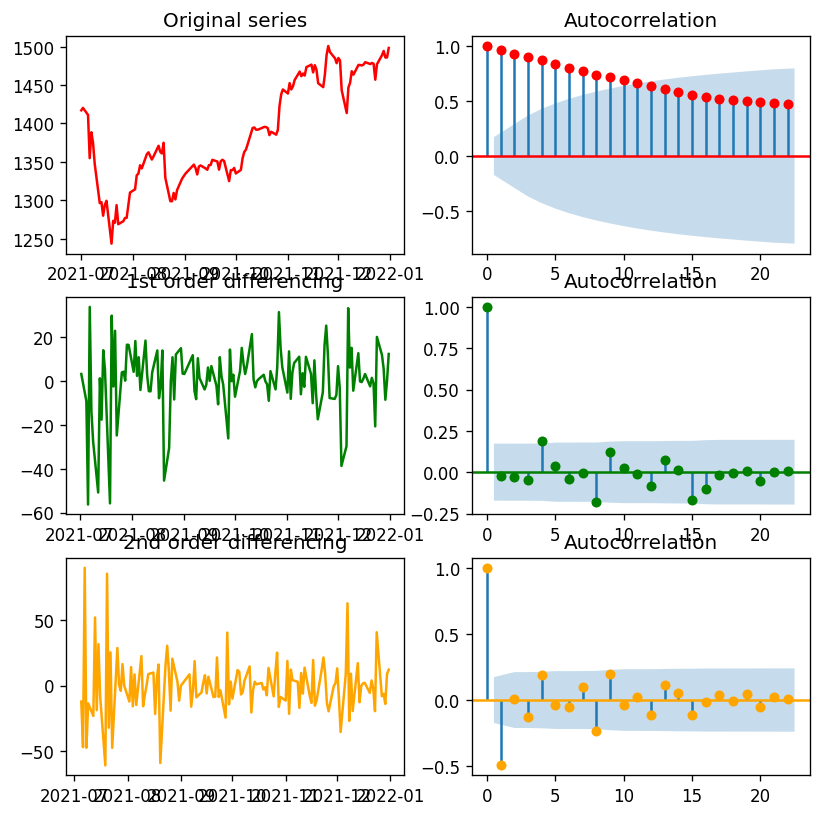

In [50]:
#1st order differencing

axis[1, 0].plot(df['Price'].diff(), color = 'green'); axis[1, 0].set_title('1st order differencing')
plot_acf(df['Price'].diff().dropna(), ax = axis[1,1], color = 'green')

#2nd order differencing

axis[2, 0].plot(df['Price'].diff().diff(), color = 'orange'); axis[2, 0].set_title('2nd order differencing')
plot_acf(df['Price'].diff().diff().dropna(), ax = axis[2, 1], color = 'orange')


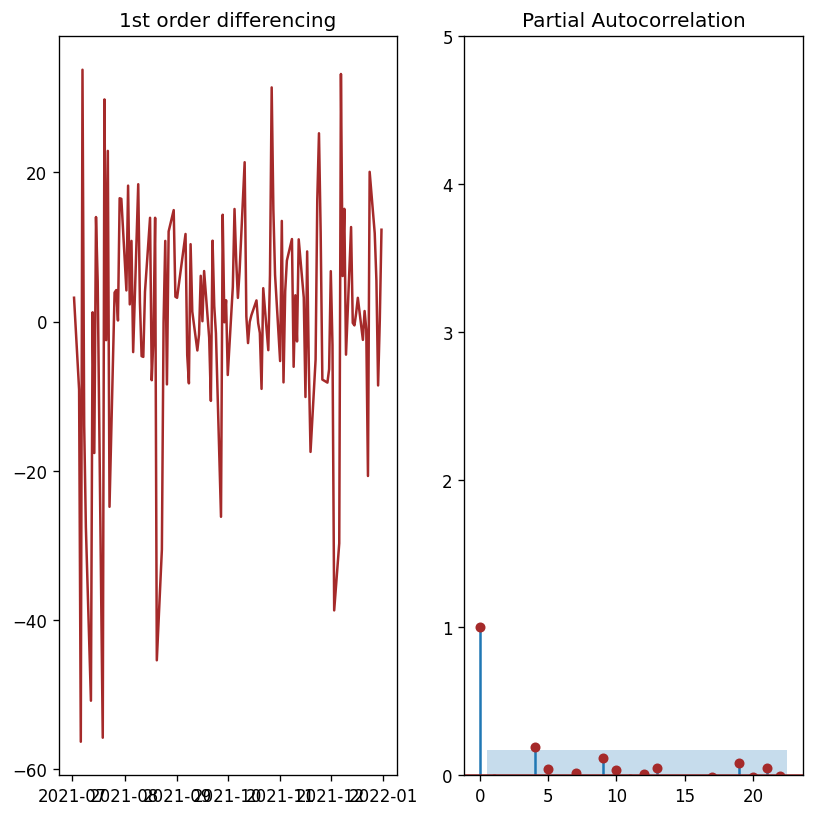

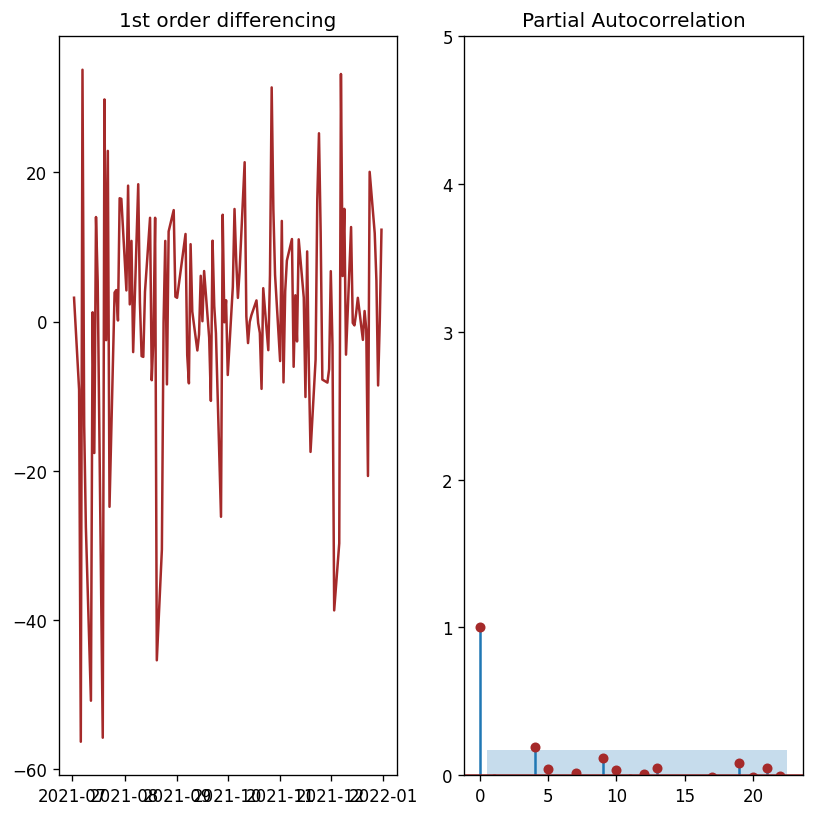

In [51]:
# PACF plot of 1st order differencing

fig, axis = plt.subplots(1, 2)
axis[0].plot(df['Price'].diff(), color = 'brown'); axis[0].set_title('1st order differencing')
axis[1].set(ylim = (0, 5))
plot_pacf(df['Price'].diff().dropna(), ax = axis[1], color = 'brown')

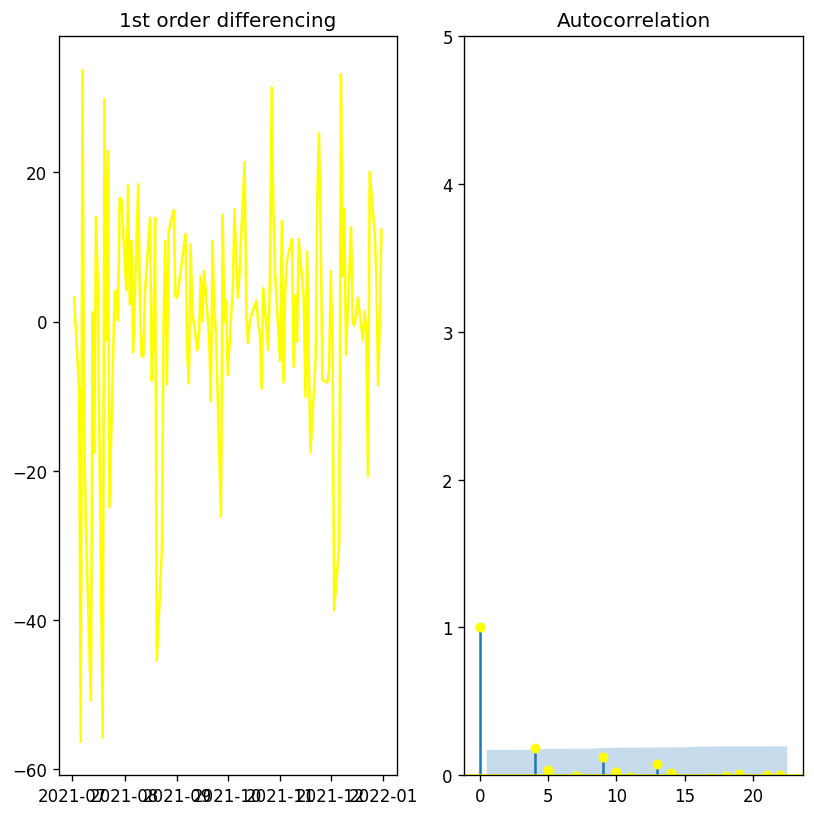

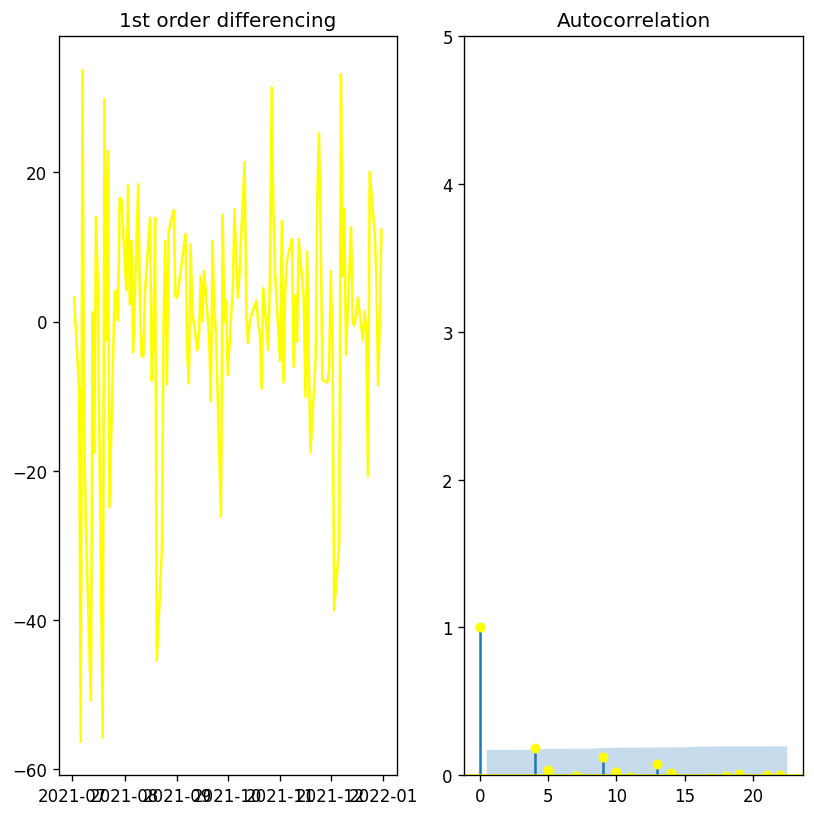

In [52]:
# ACF plot of 1st order differencing

fig, axis = plt.subplots(1, 2)
axis[0].plot(df['Price'].diff(), color = 'yellow'); axis[0].set_title('1st order differencing')
axis[1].set(ylim = (0, 5))
plot_acf(df['Price'].diff().dropna(), ax = axis[1], color = 'yellow')

In [53]:
model = ARIMA(df['Price'], order = (4, 1, 4))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  130
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -527.576
Date:                Wed, 17 May 2023   AIC                           1073.152
Time:                        06:10:16   BIC                           1098.890
Sample:                             0   HQIC                          1083.610
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2035      0.175      1.163      0.245      -0.139       0.546
ar.L2         -0.4860      0.205     -2.369      0.018      -0.888      -0.084
ar.L3          0.2504      0.179      1.396      0.1

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


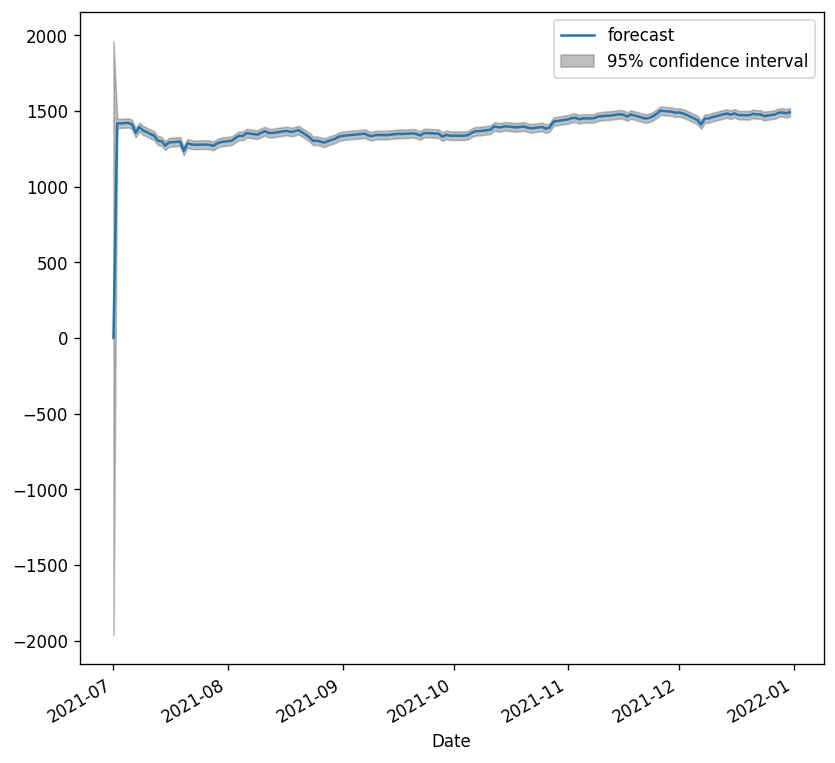

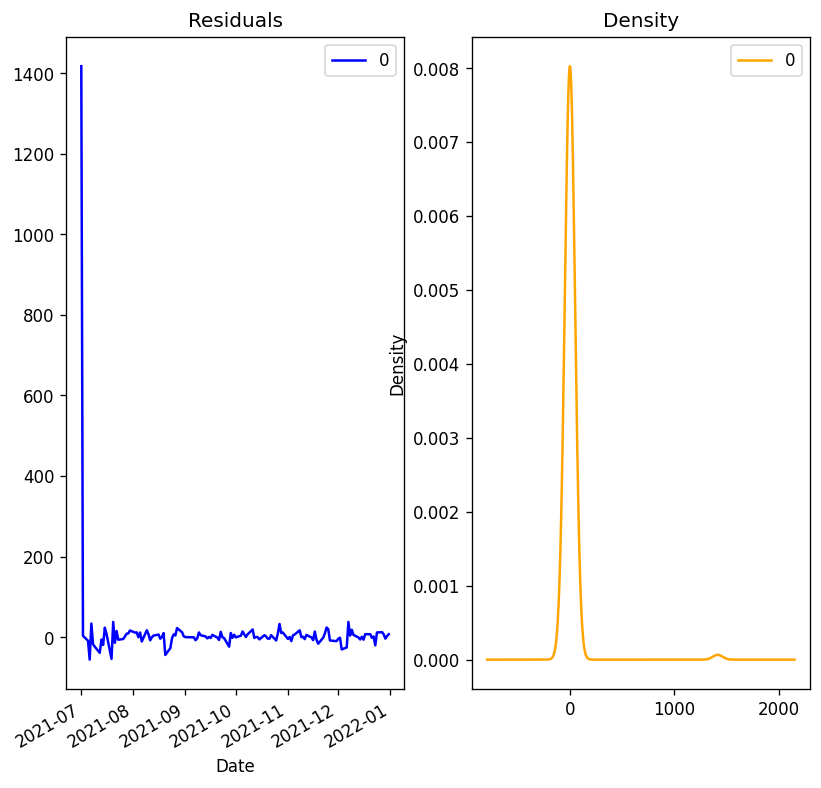

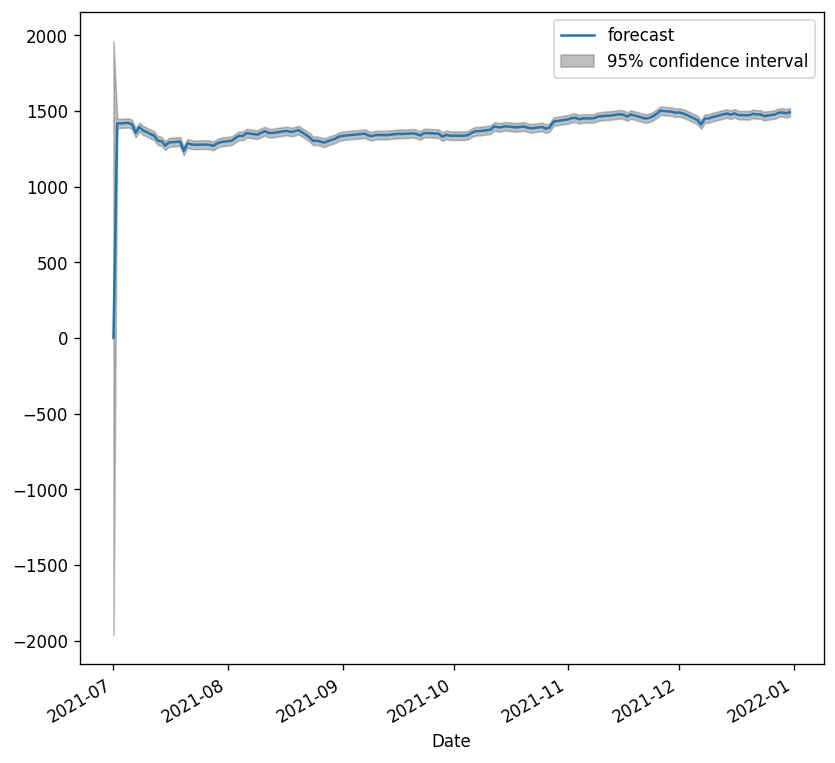

In [54]:
residuals = pd.DataFrame(model_fit.resid)
fig, axis = plt.subplots(1, 2)
residuals.plot(title = 'Residuals', ax = axis[0], color = 'blue')
residuals.plot(title = 'Density', ax = axis[1], color = 'orange', kind = 'kde')
plot_predict(model_fit, dynamic = False, ax = None)

In [55]:
train_data = df['Price'].iloc[0:100]
test_data = df['Price'].iloc[100:130]
#train_data = df['Price'].loc['7/1/21':'11/17/21']
#test_data = df['Price'].loc['11/18/21':'31/12/21']
model = ARIMA(train_data, order = (4, 1, 4))
model_arima = model.fit()
prediction = model_arima.predict()
print(prediction)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Date
2021-07-01       0.000000
2021-07-02    1417.061502
2021-07-05    1420.088413
2021-07-06    1411.517759
2021-07-07    1358.370805
                 ...     
2021-11-15    1475.081010
2021-11-16    1474.203507
2021-11-17    1466.377394
2021-11-18    1479.524372
2021-11-19    1469.479447
Name: predicted_mean, Length: 100, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
step = 30
fc = model_arima.forecast(step, alpha = 0.05, index = test_data[:step].index) #No index_col and parse dates when read file csv
print(fc)
#conf = model_arima.forecast(step, alpha = 0.05)
#fc = pd.Series(fc, index = test_data[:step].index)
#lower = pd.Series(test_data['Prediction'].iloc[:, 0], index = test_data[:step].index)
#upper = pd.Series(fc.iloc[:, 1], index = test_data[:step].index)

Date
2021-11-22    1448.358194
2021-11-23    1453.635867
2021-11-24    1450.527818
2021-11-25    1440.598449
2021-11-26    1444.957378
2021-11-29    1445.970335
2021-11-30    1440.700690
2021-12-01    1443.990906
2021-12-02    1445.379494
2021-12-03    1441.802888
2021-12-06    1443.713242
2021-12-07    1444.917675
2021-12-08    1442.478800
2021-12-09    1443.549817
2021-12-10    1444.542904
2021-12-13    1442.910463
2021-12-14    1443.482652
2021-12-15    1444.265699
2021-12-16    1443.187640
2021-12-17    1443.468336
2021-12-20    1444.064974
2021-12-21    1443.362572
2021-12-22    1443.479238
2021-12-23    1443.922063
2021-12-24    1443.470963
2021-12-27    1443.500188
2021-12-28    1443.821911
2021-12-29    1443.536722
2021-12-30    1443.523201
2021-12-31    1443.752733
Name: predicted_mean, dtype: float64


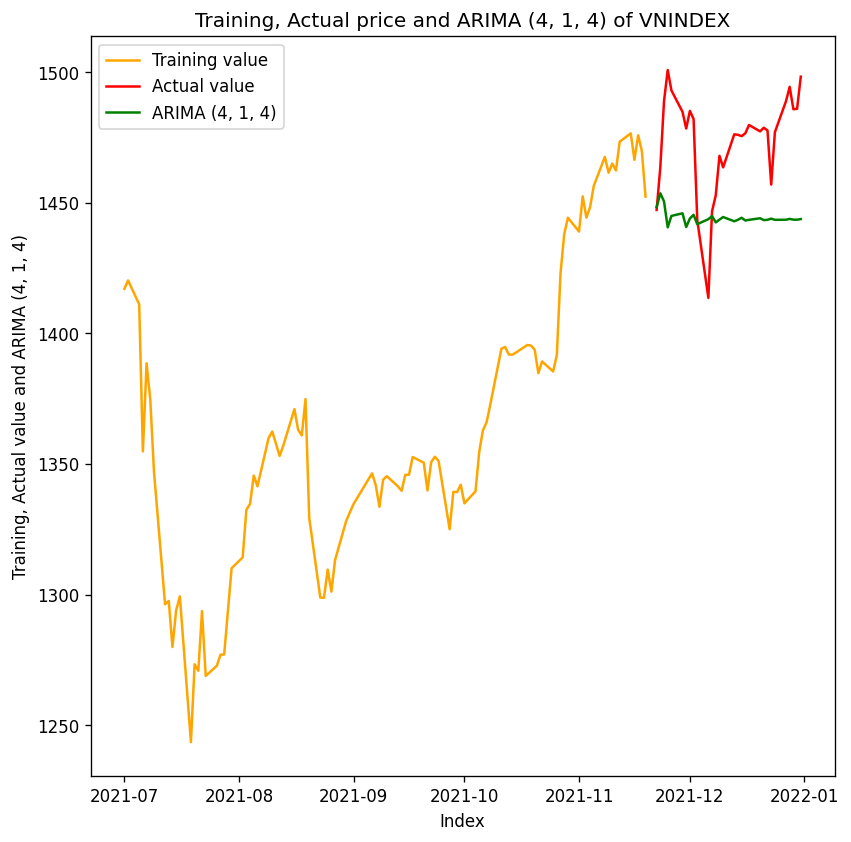

In [59]:
plt.plot(train_data, label = 'Training value', linewidth = 1.5, color = 'orange')
plt.plot(test_data, label = 'Actual value', linewidth = 1.5, color = 'red')
plt.plot(fc, label = 'ARIMA (4, 1, 4)', linewidth = 1.5, color = 'green')
#plt.fill_between(lower.index, lower, upper, alpha = 0.15, color = 'gray')
plt.title('Training, Actual price and ARIMA (4, 1, 4) of VNINDEX')
plt.xlabel('Index')
plt.ylabel('Training, Actual value and ARIMA (4, 1, 4)')
plt.legend(loc = 'best')
plt.show()

In [61]:
print('Mean Error: ', abs(np.mean(fc - test_data)))
print('Mean Absolute Error: ', np.mean(np.abs(fc - test_data)))
print('Mean Percentage Error: ', abs(np.mean((fc - test_data) / test_data)))
print('Mean Absolute Percentage Error: ', np.mean(np.abs(fc - test_data) / np.abs(test_data)))
print('Root Mean Square Error: ', np.mean((fc - test_data) ** 2)**.5)
print('Lag 1 Autocorrelation of Error: ', acf(fc - test_data) [1])
print('Correlation between actuals and forecasts: ', abs(np.corrcoef(fc, test_data) [0, 1]))
min = np.amin(np.hstack([fc[:, None], test_data[:, None]]), axis = 1)
max = np.amax(np.hstack([fc[:, None], test_data[:, None]]), axis = 1)
print('MinMax Error: ', 1 - np.mean(min / max))

Mean Error:  29.616539588303546
Mean Absolute Error:  31.699301951229707
Mean Percentage Error:  0.019934698527526308
Mean Absolute Percentage Error:  0.021406878077782958
Root Mean Square Error:  35.14083072569746
Lag 1 Autocorrelation of Error:  0.6142126197443364
Correlation between actuals and forecasts:  0.08960769194455524
MinMax Error:  0.02139202759285641


C:\Users\User\AppData\Local\Temp\ipykernel_6100\684833936.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  min = np.amin(np.hstack([fc[:, None], test_data[:, None]]), axis = 1)
C:\Users\User\AppData\Local\Temp\ipykernel_6100\684833936.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  max = np.amax(np.hstack([fc[:, None], test_data[:, None]]), axis = 1)


In [64]:
# data_result = [( abs(np.mean(fc - test_data)), np.mean(np.abs(fc - test_data)),
#                abs(np.mean((fc - test_data) / test_data)),np.mean(np.abs(fc - test_data) / np.abs(test_data)),
#                  np.mean((fc - test_data) ** 2)**.5)]
# result_df = pd.DataFrame(data = data_result, columns=['Mean Error','Mean Absolute Error'
#                                                       ,'Mean Percentage Error'
#                                                       ,'Mean Absolute Percentage Error'
#                                                       ,'Root Mean Square Error'])
# result_df.insert(0,'Model', 'ARIMA model')
# result_df

,Model,Mean Error,Mean Absolute Error,Mean Percentage Error,Mean Absolute Percentage Error,Root Mean Square Error
0,ARIMA model,29.61654,31.699302,0.019935,0.021407,35.140831


In [74]:
data_result = [( abs(np.mean(fc - test_data)), np.mean(np.abs(fc - test_data)),
               abs(np.mean((fc - test_data) / test_data)),np.mean(np.abs(fc - test_data) / np.abs(test_data)),
                 np.mean((fc - test_data) ** 2)**.5)]
df_result.loc[len(df_result)] = ['ARIMA model'] + list(data_result[0])


,Model,Mean Error,Mean Absolute Error,Mean Percentage Error,Mean Absolute Percentage Error,Root Mean Square Error
0,Linear regression model,1.294281e-13,4.453540,0.000019,0.003221,5.948352
1,ARIMA model,2.961654e+01,31.699302,0.019935,0.021407,35.140831
2,ARIMA model,2.961654e+01,31.699302,0.019935,0.021407,35.140831


In [75]:
# df_result = df_result.drop(2)
# df_result

,Model,Mean Error,Mean Absolute Error,Mean Percentage Error,Mean Absolute Percentage Error,Root Mean Square Error
0,Linear regression model,1.294281e-13,4.453540,0.000019,0.003221,5.948352
1,ARIMA model,2.961654e+01,31.699302,0.019935,0.021407,35.140831


## 3)LSTM model

In [76]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [77]:
data = df.sort_index(ascending = True, axis = 0)
new_data = pd.DataFrame(index = range(0, len(df)), columns = ['Date', 'Price'])

In [80]:
day = 8

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Price'][i] = data['Price'][i]

In [83]:
new_data.index = new_data.Date 
new_data.drop('Date', axis = 1, inplace = True)

In [84]:
final_data = new_data.values
train_data = final_data[:100,:]
test_data = final_data[100:,:]

In [90]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(final_data)
x_train_data, y_train_data = [], []

In [91]:
for i in range(day, len(train_data)):
    x_train_data.append(scaled_data[i - day:i, 0])
    y_train_data.append(scaled_data[i, 0])
    
x_train_data = np.array(x_train_data)
y_train_data = np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

In [92]:
lstm_model = Sequential()
lstm_model.add(LSTM(units = 200, return_sequences = True, input_shape = (x_train_data.shape[1], 1)))
#lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train_data.shape[1], 1)))
#lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units = 50, return_sequences = False))
lstm_model.add(Dense(units = 1))

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 8, 100)            120400    
                                                                 
 lstm_2 (LSTM)               (None, 8, 50)             30200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 332,451
Trainable params: 332,451
Non-trainable params: 0
_________________________________________________________________


In [93]:
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(x_train_data, y_train_data, batch_size = 1, epochs = 25)

Epoch 1/25
92/92 [==============================] - 5s 7ms/step - loss: 0.0466
Epoch 2/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0248
Epoch 3/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0311
Epoch 4/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0197
Epoch 5/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0194
Epoch 6/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0187
Epoch 7/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0184
Epoch 8/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0137
Epoch 9/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0151
Epoch 10/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0089
Epoch 11/25
92/92 [==============================] - 1s 6ms/step - loss: 0.0076
Epoch 12/25
92/92 [==============================] - 1s 7ms/step - loss: 0.0081
Epoch 13/25
92/92 [==============================

In [94]:
input_data = new_data[len(new_data) - len(test_data) - day:].values
input_data = input_data.reshape(-1, 1)
input_data = scaler.transform(input_data)

x_test = []

for i in range(day, input_data.shape[0]):
    x_test.append(input_data[i - day:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [95]:
price = lstm_model.predict(x_test)
price = scaler.inverse_transform(price)

lstm_model.save('save_lstm_model.h5')

train_data = new_data[:100]
test_data = new_data[100:]
test_data['Prediction'] = price 

1/1 [==============================] - 2s 2s/step


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


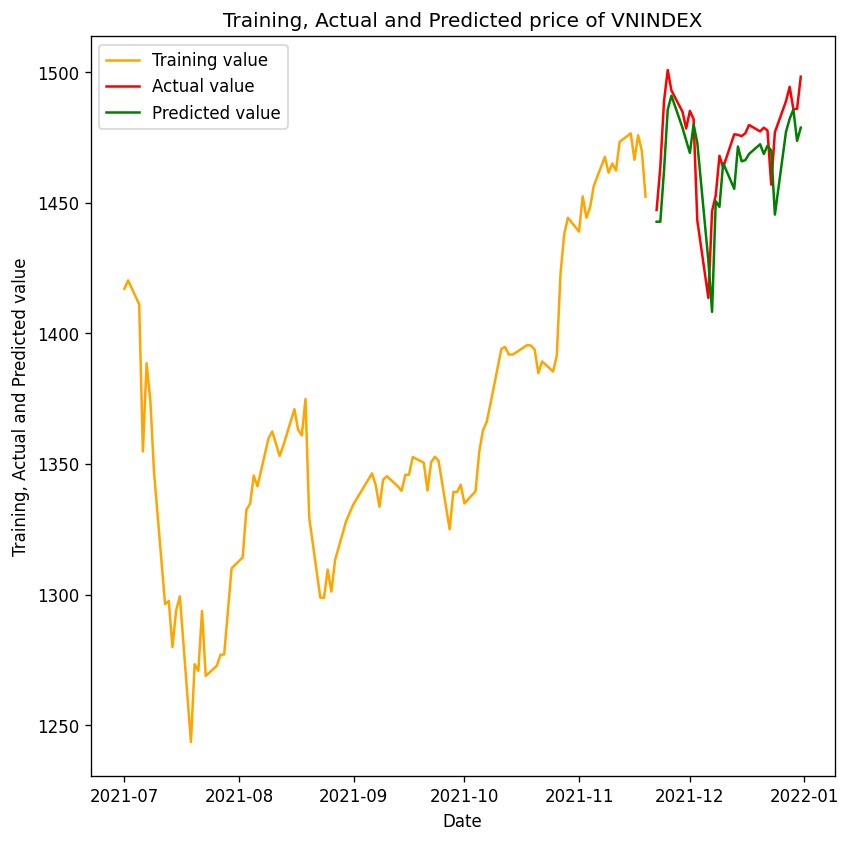

In [96]:
plt.plot(train_data['Price'], label = 'Training value', linewidth = 1.5, color = 'orange')
plt.plot(test_data['Price'], label = 'Actual value', linewidth = 1.5, color = 'red')
plt.plot(test_data['Prediction'], label = 'Predicted value', linewidth = 1.5, color = 'green')
plt.title('Training, Actual and Predicted price of VNINDEX')
plt.xlabel('Date')
plt.ylabel('Training, Actual and Predicted value')
plt.legend(loc = 'best')
plt.show()


In [97]:
print('Mean Error: ', abs(np.mean( test_data['Prediction']- test_data['Price'])))
print('Mean Absolute Error: ', np.mean(np.abs(test_data['Prediction'] - test_data['Price'])))
print('Mean Percentage Error: ', abs(np.mean((test_data['Prediction'] - test_data['Price']) / test_data['Price'])))
print('Mean Absolute Percentage Error: ', np.mean(np.abs(test_data['Prediction'] - test_data['Price']) / np.abs(test_data['Price'])))
print('Root Mean Square Error: ', np.mean((test_data['Prediction'] - test_data['Price']) ** 2)**.5)

Mean Error:  8.818522298177072
Mean Absolute Error:  12.719533040364581
Mean Percentage Error:  0.005937126805961324
Mean Absolute Percentage Error:  0.008646970962710986
Root Mean Square Error:  15.917837821052288


In [100]:
data_result = [( abs(np.mean(test_data['Prediction'] - test_data['Price'])), np.mean(np.abs(test_data['Prediction'] - test_data['Price'])),
               abs(np.mean((test_data['Prediction'] - test_data['Price']) / test_data['Price'])),np.mean(np.abs(test_data['Prediction'] - test_data['Price']) / np.abs(test_data['Price'])),
                 np.mean((test_data['Prediction'] - test_data['Price']) ** 2)**.5)]
df_result.loc[len(df_result)] = ['LSTM model'] + list(data_result[0])

In [103]:
df_result

,Model,Mean Error,Mean Absolute Error,Mean Percentage Error,Mean Absolute Percentage Error,Root Mean Square Error
0,Linear regression model,1.294281e-13,4.453540,0.000019,0.003221,5.948352
1,ARIMA model,2.961654e+01,31.699302,0.019935,0.021407,35.140831
3,LSTM model,8.818522e+00,12.719533,0.005937,0.008647,15.917838
